# Import libraries :open_file_folder:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import warnings
import joblib

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgbm

# Ignore WARNINGS :warning:

In [2]:
warnings.filterwarnings('ignore')

# Read CSV file :scroll:

In [3]:
df = pd.read_csv("../../src/alpha1.csv")
df

,id,address,price,floor,total_floors,rooms,square,city,remont,balcon,uid,view,year,type_perec,hot_water,fundament,kitchen,total_floor,Unnamed: 0
0,0.0,"улица Туполева, 15",3100000,9,9.0,1,36.4,Воронеж,standard,1,2059802857,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2",NaN,NaN
1,1.0,"улица Фёдора Тютчева, 99",3270000,4,9.0,1,30.0,Воронеж,standard,1,2059678399,garden,2011.0,Железобетонный,0.0,0.0,0,NaN,NaN
2,2.0,"улица Фёдора Тютчева, 95Е",3350000,1,9.0,1,32.4,Воронеж,standard,1,2057432696,garden,2013.0,Железобетонный,0.0,0.0,9 м2,NaN,NaN
3,3.0,"переулок Парашютистов, 6",2800000,5,5.0,1,30.4,Воронеж,standard,1,2059084407,garden,1970.0,Железобетонный,0.0,0.0,6 м2,NaN,NaN
4,4.0,"улица Чебышева, 16",2100000,2,5.0,1,30.2,Воронеж,standard,1,2059631819,garden,1976.0,0,0.0,0.0,6 м2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70661,NaN,"3-й Крутицкий переулок, 11",53000000,8,NaN,4,116.7,Москва,design,2,2059807526,street,2003.0,Железобетонный,0,0,14 м2,19.0,11160.0
70662,NaN,"Мичуринский проспект, 11к1",54800000,6,NaN,4,132.0,Москва,design,2,2058216516,street,2001.0,Железобетонный,0,0,"12,8 м2",17.0,11161.0
70663,NaN,"улица Дзержинского, 6",18600000,4,NaN,4,132.0,Москва,well_done,2,1523532836,street,2010.0,Железобетонный,0,0,"20,4 м2",16.0,11162.0
70664,NaN,"Профсоюзная улица, 104",46500000,14,NaN,4,137.2,Москва,well_done,2,2058030172,street,2006.0,Железобетонный,0,0,"18,2 м2",17.0,11163.0


# Drop unnecessary columns :x:

In [4]:
df = df.drop(["id", "total_floor", "uid", "address", 'Unnamed: 0'], axis=1)
df


,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,9.0,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2"
1,3270000,4,9.0,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0
2,3350000,1,9.0,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9 м2
3,2800000,5,5.0,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6 м2
4,2100000,2,5.0,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70661,53000000,8,NaN,4,116.7,Москва,design,2,street,2003.0,Железобетонный,0,0,14 м2
70662,54800000,6,NaN,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,"12,8 м2"
70663,18600000,4,NaN,4,132.0,Москва,well_done,2,street,2010.0,Железобетонный,0,0,"20,4 м2"
70664,46500000,14,NaN,4,137.2,Москва,well_done,2,street,2006.0,Железобетонный,0,0,"18,2 м2"


# Fix kitchen values :wrench:

In [5]:
i = 0
for value in df['kitchen']:
    try:
        temp_list = value.split("\xa0")
        value = temp_list[0]
        value = value.replace(",", ".")
    except:
        pass
    value = float(value)
    df['kitchen'][i] = value
    i += 1
    print(i, "/", len(df['kitchen']), " " , ceil((i * 100) / len(df['kitchen'])), "%" , end='\r')

In [6]:
df

,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,9.0,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,8.5
1,3270000,4,9.0,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0.0
2,3350000,1,9.0,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9.0
3,2800000,5,5.0,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6.0
4,2100000,2,5.0,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70661,53000000,8,NaN,4,116.7,Москва,design,2,street,2003.0,Железобетонный,0,0,14.0
70662,54800000,6,NaN,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,12.8
70663,18600000,4,NaN,4,132.0,Москва,well_done,2,street,2010.0,Железобетонный,0,0,20.4
70664,46500000,14,NaN,4,137.2,Москва,well_done,2,street,2006.0,Железобетонный,0,0,18.2


# Exploratory Data Analysis (EDA) :gem: :mag:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70666 entries, 0 to 70665
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         70666 non-null  int64  
 1   floor         70666 non-null  int64  
 2   total_floors  23929 non-null  float64
 3   rooms         70666 non-null  int64  
 4   square        70666 non-null  float64
 5   city          70666 non-null  object 
 6   remont        70666 non-null  object 
 7   balcon        70666 non-null  int64  
 8   view          70666 non-null  object 
 9   year          62790 non-null  float64
 10  type_perec    62790 non-null  object 
 11  hot_water     62790 non-null  object 
 12  fundament     62790 non-null  object 
 13  kitchen       62790 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 7.5+ MB


In [8]:
df.isna().sum()

price               0
floor               0
total_floors    46737
rooms               0
square              0
city                0
remont              0
balcon              0
view                0
year             7876
type_perec       7876
hot_water        7876
fundament        7876
kitchen          7876
dtype: int64

In [9]:
df.describe()

,price,floor,total_floors,rooms,square,balcon,year
count,7.066600e+04,70666.000000,23929.000000,70666.000000,70666.000000,70666.000000,62790.000000
mean,1.329058e+07,7.388136,12.191274,1.914811,57.930148,1.157261,1930.982720
std,2.073388e+07,5.175612,6.281702,1.008456,29.127322,0.364049,367.292531
min,5.200000e+05,1.000000,1.000000,0.000000,10.800000,1.000000,0.000000
25%,5.350000e+06,3.000000,7.000000,1.000000,39.000000,1.000000,1979.000000
50%,8.450000e+06,6.000000,10.000000,2.000000,53.000000,1.000000,2009.000000
75%,1.480000e+07,10.000000,17.000000,3.000000,68.000000,1.000000,2018.000000
max,7.248046e+08,43.000000,47.000000,4.000000,586.000000,2.000000,2230.000000


In [10]:
df.duplicated().sum()
df = df.drop_duplicates()

In [11]:
df

,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,9.0,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,8.5
1,3270000,4,9.0,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0.0
2,3350000,1,9.0,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9.0
3,2800000,5,5.0,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6.0
4,2100000,2,5.0,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70648,44000000,8,NaN,4,155.0,Москва,design,1,street,2011.0,Железобетонный,0,0,40.0
70649,17900000,2,NaN,4,120.0,Москва,well_done,1,street,2022.0,0,0,0,16.0
70657,35000000,14,NaN,4,133.6,Москва,design,2,street,2014.0,Железобетонный,Центральное,0,19.1
70662,54800000,6,NaN,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,12.8


In [12]:
# df = df.dropna() <-- suboptimal
# df.isna().sum()
for column in ["total_floors", "year"]:
    df[column] = df[column].fillna(df[column].median())

In [13]:
for column in ['type_perec', 'hot_water', 'fundament', 'kitchen']:
    df[column] = df[column].fillna("0")


In [14]:
df

,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,9.0,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,8.5
1,3270000,4,9.0,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0.0
2,3350000,1,9.0,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9.0
3,2800000,5,5.0,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6.0
4,2100000,2,5.0,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70648,44000000,8,10.0,4,155.0,Москва,design,1,street,2011.0,Железобетонный,0,0,40.0
70649,17900000,2,10.0,4,120.0,Москва,well_done,1,street,2022.0,0,0,0,16.0
70657,35000000,14,10.0,4,133.6,Москва,design,2,street,2014.0,Железобетонный,Центральное,0,19.1
70662,54800000,6,10.0,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,12.8


In [15]:
df.nunique()

price           3637
floor             41
total_floors      35
rooms              5
square          2293
city              92
remont             5
balcon             2
view               5
year             158
type_perec         9
hot_water         12
fundament         12
kitchen          432
dtype: int64

In [16]:
df['city'].unique()

array(['Воронеж', 'Оренбург', 'Орёл', 'Владивосток', 'Омск', 'Волгоград',
       'Уфа', 'Тверь', 'Калининград', 'Тольятти', 'Пермь', 'Краснодар',
       'Сочи', 'Долгопрудный', 'Домодедово', 'Иваново', 'Курск', 'Липецк',
       'Магнитогорск', 'Курган', 'коттеджный посёлок Лазурный Берег',
       'садоводческое некоммерческое товарищество Агро', 'СТ Прохлада',
       'СНТ Заря-2', 'садоводческое товарищество Лысая Гора',
       'СТ Швейник', 'коттеджный посёлок Домодедово Таун',
       'СНТ Здоровье-4', 'ЖСК Ветеран-Нагорный',
       'коттеджный посёлок Приуральский', 'Самара', 'Санкт-Петербург',
       'посёлок Шушары', 'Павловск', 'Пушкин', 'Ломоносов',
       'посёлок Парголово', 'Кронштадт', 'Колпино', 'Красное Село',
       'посёлок Металлострой', 'Сестрорецк', 'посёлок Репино', 'Петергоф',
       'посёлок Стрельна', 'посёлок Молодёжное', 'посёлок Понтонный',
       'посёлок Песочный', 'Зеленогорск', 'посёлок Лисий Нос',
       'Парголово', 'посёлок Сапёрный', 'Шушары', 'Казань',


# Visualization (graphics)

In [17]:
count_rooms = df['rooms'].value_counts()
count_rooms

rooms
2    21425
1    15687
3    15421
0     4009
4     2628
Name: count, dtype: int64

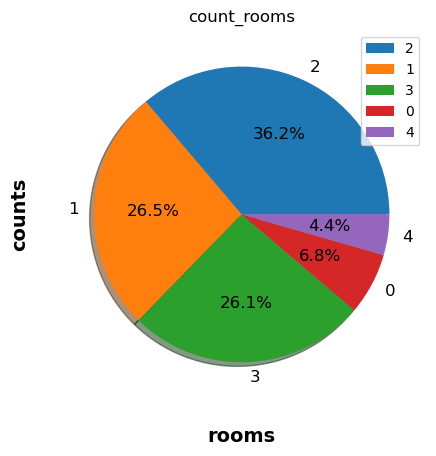

In [18]:
plt.figure()
explode = (0,0.09)
count_rooms.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_rooms')
plt.xlabel('rooms', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_rooms.index, loc = "best")
plt.show()

In [19]:
count_view = df['view'].value_counts()
count_view

view
garden    30856
street    19644
park       3924
forest     2492
water      2254
Name: count, dtype: int64

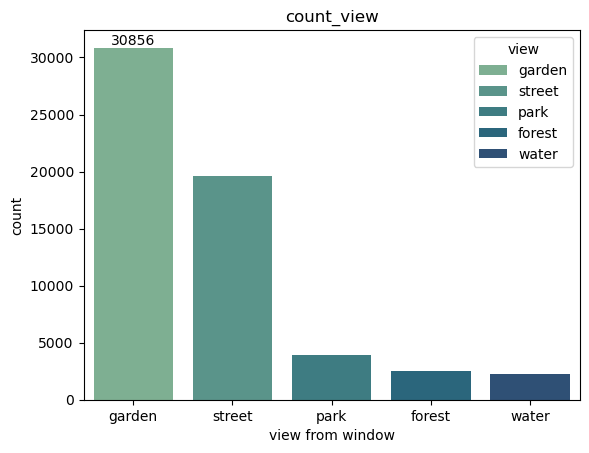

In [20]:
plt.figure()
ax = sns.barplot(x=count_view.index, y=count_view.values, palette='crest', legend=True, hue=count_view.index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('count_view')
plt.xlabel('view from window')
plt.ylabel('count')
plt.show()

In [21]:
count_city = df['city'].value_counts()
count_city

city
Москва                                11464
Санкт-Петербург                       10825
Краснодар                              6540
Сочи                                   4807
Воронеж                                2643
                                      ...  
СНТ Заря-2                                1
посёлок Птичное                           1
коттеджный посёлок Домодедово Таун        1
ЖСК Ветеран-Нагорный                      1
посёлок Газопровод                        1
Name: count, Length: 92, dtype: int64

In [22]:
count_fundament = df['fundament'].value_counts()
count_fundament

fundament
0                  48271
Ленточный           5138
Свайный             2299
Иной                1467
Бетонные столбы      717
0.0                  410
Сборный              397
Сплошной             389
Столбчатый            59
Комбинированный       15
Железобетон            6
Монолитный             2
Name: count, dtype: int64

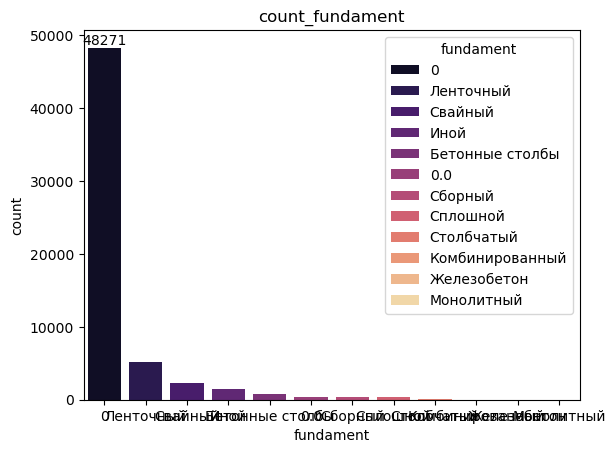

In [23]:
plt.figure()
ax = sns.barplot(x = count_fundament.index, y = count_fundament.values, palette='magma', legend=True, hue=count_fundament.index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('count_fundament')
plt.xlabel('fundament')
plt.ylabel('count')
plt.show()

In [24]:
count_type_perec = df['type_perec'].value_counts()
count_type_perec

type_perec
Железобетонный    39935
0                 17287
Смешанный           698
Монолитный          515
Деревянный          443
Иное                244
0.0                  27
Бетонный             20
Кирпичный             1
Name: count, dtype: int64

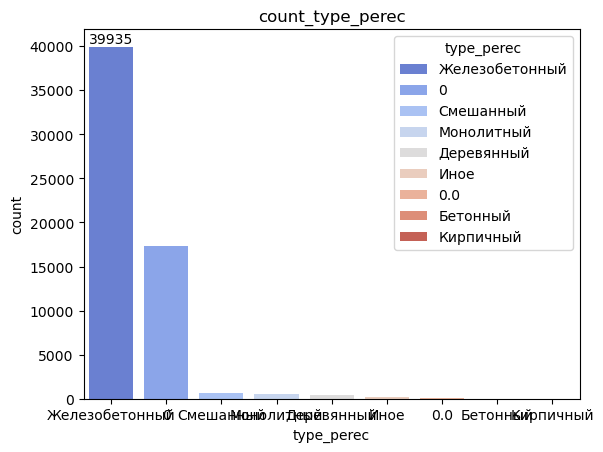

In [25]:
plt.figure()
ax = sns.barplot(x = count_type_perec.index,y = count_type_perec.values, palette='coolwarm', legend=True, hue=count_type_perec.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_type_perec')
plt.xlabel('type_perec')
plt.ylabel('count')
plt.show()

In [26]:
count_hot_water = df['hot_water'].value_counts()
count_hot_water

hot_water
0                                                                            46983
Центральное                                                                   7600
Закрытая с приготовлением горячей воды на ЦТП                                 1382
Открытая с отбором сетевой воды на горячее водоснабжение из тепловой сети     1190
Поквартирный котел                                                            1055
Квартирное (квартирный котел)                                                  267
Автономная котельная (крышная встроенно-пристроенная)                          196
0.0                                                                            192
Закрытая с приготовлением горячей воды на ИТП                                  168
Газовая колонка                                                                135
Индивидуальный тепловой пункт (ИТП)                                              1
центральное                                                                  

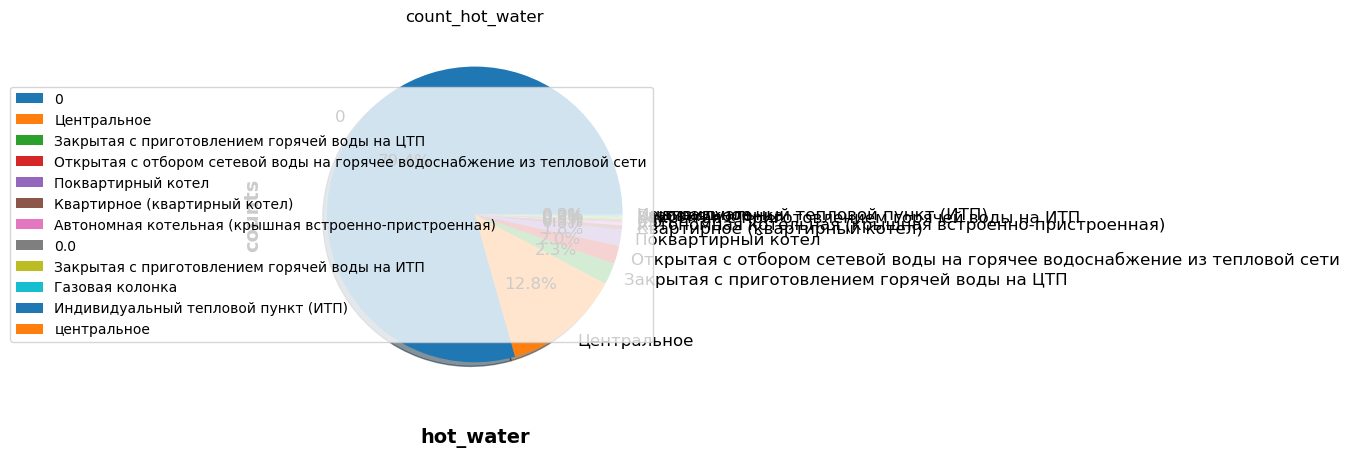

In [27]:
plt.figure()
explode = (0,0.09)
count_hot_water.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_hot_water')
plt.xlabel('hot_water', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_hot_water.index, loc = "best")
plt.show()

In [28]:
count_remont = df['remont'].value_counts()
count_remont

remont
standard          19162
well_done         18762
design            11139
without_repair    10009
simple               98
Name: count, dtype: int64

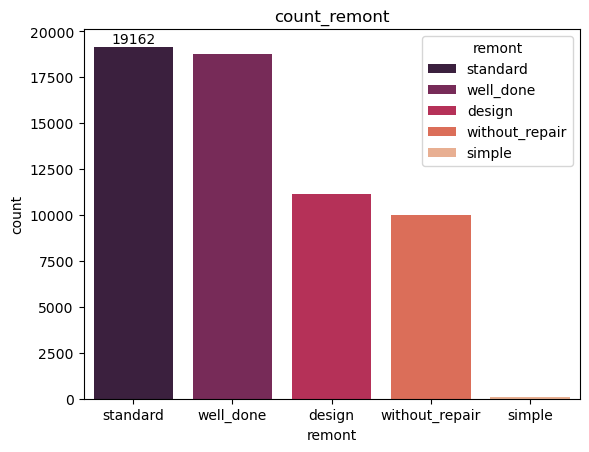

In [29]:
plt.figure()
ax = sns.barplot(x=count_remont.index,y=count_remont.values, palette='rocket', legend=True, hue=count_remont.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_remont')
plt.xlabel('remont')
plt.ylabel('count')
plt.show()

# Encoding Data :bomb:

In [30]:
le = LabelEncoder()
columns = ["city", "remont", "view", "type_perec", "hot_water", "fundament", "year"]
for column in columns:
    df[column]=le.fit_transform(df[column])

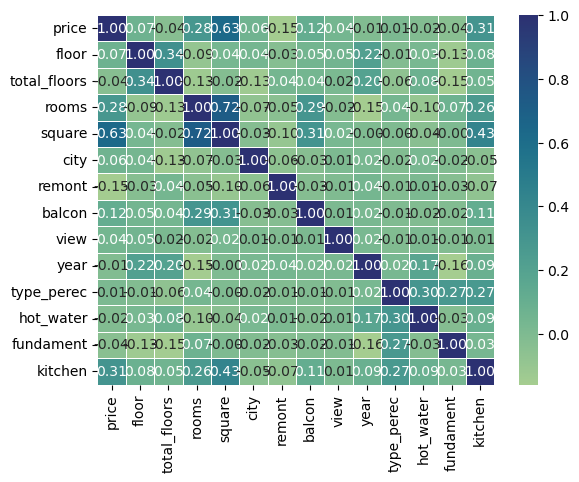

In [31]:
plt.figure()
sns.heatmap(df.corr(), cmap='crest', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [32]:
df

,price,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,9.0,1,36.4,2,2,1,1,113,4,1,1,8.5
1,3270000,4,9.0,1,30.0,2,2,1,1,138,4,1,1,0.0
2,3350000,1,9.0,1,32.4,2,2,1,1,140,4,1,1,9.0
3,2800000,5,5.0,1,30.4,2,2,1,1,97,4,1,1,6.0
4,2100000,2,5.0,1,30.2,2,2,1,1,103,0,1,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70648,44000000,8,10.0,4,155.0,22,0,1,3,138,4,0,0,40.0
70649,17900000,2,10.0,4,120.0,22,3,1,3,149,0,0,0,16.0
70657,35000000,14,10.0,4,133.6,22,0,2,3,141,4,10,0,19.1
70662,54800000,6,10.0,4,132.0,22,0,2,3,128,4,0,0,12.8


# :star: Features & Target :dart: 

In [33]:
x = df.drop(columns=['price'])
y = df['price']

In [34]:
y

0         3100000
1         3270000
2         3350000
3         2800000
4         2100000
           ...   
70648    44000000
70649    17900000
70657    35000000
70662    54800000
70663    18600000
Name: price, Length: 59170, dtype: int64

In [35]:
y=y.values.reshape(-1,1)
y

array([[ 3100000],
       [ 3270000],
       [ 3350000],
       ...,
       [35000000],
       [54800000],
       [18600000]])

# :mag: Scaling and split :scissors:

In [36]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, shuffle=True, random_state=77)
joblib.dump(scaler_x, "../../scalers/alpha1_x.bin")
joblib.dump(scaler_y, "../../scalers/alpha1_y.bin")

['../../scalers/alpha1_y.bin']

# Teach Models :books:

In [37]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgbm.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor()
}

Name = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting Regressor', 'ADA Boost', 'K Neighbors Regressor', 'CatBoost']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Decision Tree:
Mean Squared Error (MSE): 0.00011020106470441106
Root Mean Squared Error (RMSE): 0.010497669489196688
Mean Absolute Error (MAE): 0.002611978065552995
R-squared Score: 0.8521578502338147

Results for Random Forest:
Mean Squared Error (MSE): 7.544268121515912e-05
Root Mean Squared Error (RMSE): 0.008685774646809525
Mean Absolute Error (MAE): 0.002685035390747894
R-squared Score: 0.8987885624799442

Results for XGBoost:
Mean Squared Error (MSE): 0.00012160695294206772
Root Mean Squared Error (RMSE): 0.011027554259311886
Mean Absolute Error (MAE): 0.003860763169041478
R-squared Score: 0.8368560830360927

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 47336, number of used features: 13
[LightGBM] [I

In [38]:
accuracy

[0.8521578502338147,
 0.8987885624799442,
 0.8368560830360927,
 0.7949108510434404,
 0.7956143995862281,
 0.048348735708271806,
 0.5492640435849423,
 0.8428989583454488]

# Save the best model :floppy_disk:

In [39]:
# name = Name[accuracy.index(max(accuracy))]
# model = models[Name[accuracy.index(max(accuracy))]]
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
    
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
    
# print(f"Results for {name}:")
# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("Mean Absolute Error (MAE):", mae)
# print("R-squared Score:", r2)

model.save_model("../../models/alpha1.bin")


In [40]:
model.feature_importances_

array([ 5.70588489,  1.74085153,  3.44113599, 38.48751814, 21.44947562,
        5.82300187,  1.65315349,  0.26772731, 11.96160164,  0.76915435,
        0.80249841,  0.87536703,  7.02262974])

# Test the best model :triangular_ruler:

# Import test dataset :scroll:

In [41]:
x_plus = pd.read_csv("../../src/predict_test.csv")

In [42]:
x_plus

,floor,total_floors,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,12,25,3,74.6,Москва,design,2,water,2018,Железобетонный,Центральное,Железобетонный,13.9


In [43]:
columns = ["city", "remont", "view", "type_perec", "hot_water", "fundament", "year"]
for column in columns:
    x_plus[column]=le.fit_transform(x_plus[column])
    
x_plus = scaler_x.fit_transform(x_plus)

In [44]:
y_pred_plus = model.predict(x_plus)
y_pred_plus

array([0.00399369])

In [45]:
[y_pred_plus]

[array([0.00399369])]

In [46]:
y_pred_plus = scaler_y.inverse_transform([y_pred_plus])
ceil(y_pred_plus[0][0])

3412570